In this section, we will go through a simple machine learning application and create our first model. In the process, we will introduce some core concepts and terms:

Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters.

Because we have measurements for which we know the correct species of iris, this is a **supervised learning** problem. In this problem, we want to *predict* one of several options (the species of iris). This is an example of a **classification** problem. The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem. The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its *label*.

## Meet the Data

The data we will use for this example is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function:

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned by load_iris is a Bunch object, like dictionary. It contain keys and values.

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value of the key <code>DESCR</code> is a short description of the dataset.

In [3]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The value of the key <code>target_names</code> is an array of strings, containing the species of flower that we want to predict:

In [ ]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value feature_names is a list of strings, giving the description of each feature:

In [5]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [6]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower:

In [7]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


We can see that the array contains measurements for 150 different flowers. Remember that the individual items are called samples in machine learning, and their properties are called features. The shape of the data array is the number of samples multiplied by the number of features. This is a convention in scikit-learn, and your data will always be assumed to be in this shape. Here are the feature values for the first five samples:

In [8]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The target array contains the species of each of the flowers that were measured, also as a NumPy array:

In [10]:
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


Target is one-dimensional, with one entry per flower. The species are encoded as integers from 0 to 2:

In [11]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meaning of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica.

## Training and Testing Data

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics, where x is the input to a function and y is the output. Following more conventions from mathematics, we use a capital X because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).

Unfortunately, we cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This "remembering" does not indicate to us whether our model will generalize well (in other words, whether it will also perform well on new data)

sci-kit learn has a function that shuffles the dataset and splits it for you; this is the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels are declared as the test set. Deciding on how much data you want to put into your training and test sets is somewhat arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


## Data Inspection

Before running into building a model, it is always a good idea to inspect the data, to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common.

There are a lot of ways to visualize data; one of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis, one feature along the y-axis, and draws a dot for each data point. Unfortunately, computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time. It is difficult to plot datasets with more than three features this way. One way around this problem is to do a pair plot, which looks at all pairs of two features. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\My computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because

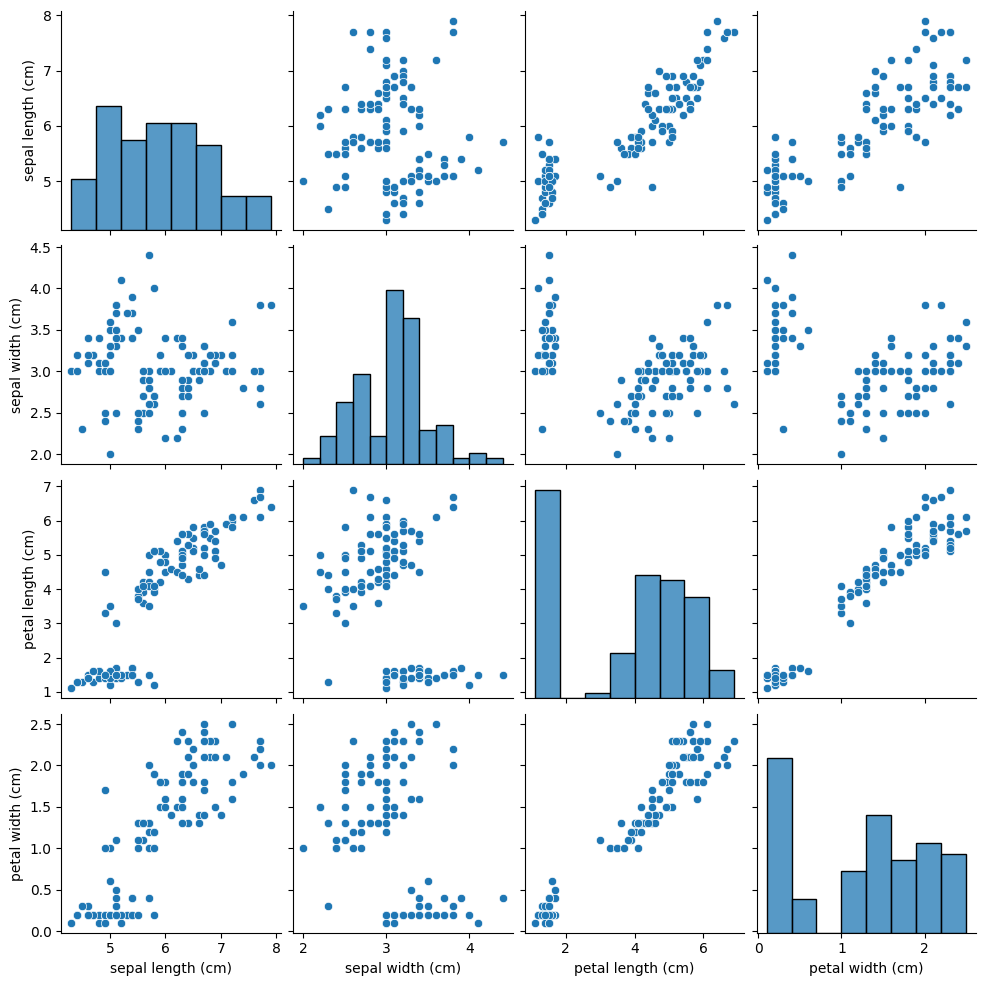

In [19]:
import pandas as pd
import seaborn as sns
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
sns.pairplot(iris_dataframe, palette='bright')

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.

## First model: k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classification algorithms in scikit-learn that we could use. Here we will use a k-nearest neighbors classifier, which is easy to understand. Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The k is a parameter that specifies how many neighbors will contribute to the prediction. We will start with a single neighbor for now:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

To build the model on the training set, we call the fit method of the knn object, which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels:

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The fit method returns the knn object, so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model. Nearly all of them are the default values, but you can also find n_neighbors=1, which is the parameter that we passed.

If you don't understand anything, don't worry. We will go through all of these concepts in detail in the following chapters. For now, we will just proceed with our classification task and see how well the model works on the test set.

## Making Predictions

We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm and a petal width of 0.2 cm. What species of iris would this be? We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of features (4):

In [23]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a 2D NumPy array, as scikit-learn always expects 2D arrays for the data.

Now we'll use our model to predict the label of this data point. We call the predict method of the knn object:

In [25]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to class 0, meaning its species is setosa. But how do we know whether we can trust our model? We don't know the correct species of this sample, which is the whole point of building the model!

## First step in Evaluation: Accuracy

This is where the test set that we created earlier comes in. This data wasn't used to build but to evaluate the model. We know what the correct species is for each iris in the test set, so we can compare it against the model's prediction.

In [26]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
from sklearn.metrics import accuracy_score

print("Test set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Test set score: 0.97


For this example, we chose one of the simplest machine learning models, and it yielded 97% accuracy on the test set. In later chapters we will go into more depth about what this accuracy means and how it is computed. For this high level overview, we can assume that our model gives the correct species for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. For our hobby botanist application, this high level of accuracy means that our model may be trustworthy enough to use.